In [1]:
from methods_analysis import *

### 1. Load data

In [2]:
full_df = pd.read_parquet('datasets/input/full_df_clf_corrected.parquet')
pol_img_only = pd.read_parquet('datasets/input/pol_img_only.parquet')
pol_img_only_ref_results = pd.read_parquet('datasets/input/pol_img_only_ref_results.parquet')
non_pol_img_but_ref = pd.read_parquet('datasets/input/non_pol_img_but_ref.parquet')

In [3]:
datasets = [full_df, pol_img_only, pol_img_only_ref_results, non_pol_img_but_ref]
for dataset in datasets:
    dataset['politician_in_img'] = dataset['politician_in_img'].apply(lambda x: sorted(x))

In [4]:
print(f'The full dataset contains the following columns: {full_df.columns.tolist()}')

The full dataset contains the following columns: ['idx', 'dataset', 'id', 'url', 'img_link', 'alt_txt', 'datetime', 'date', 'category', 'tags', 'comments_count', 'title', 'paragraphs', 'politician_in_img', 'PVV_title', 'GL-PvdA_title', 'VVD_title', 'NSC_title', 'D66_title', 'BBB_title', 'CDA_title', 'SP_title', 'FVD_title', 'PvdD_title', 'CU_title', 'SGP_title', 'DENK_title', 'Volt_title', 'JA21_title', 'Bij1_title', 'BvNL_title', 'Positions_title', 'Politics_title', 'Issues_title', 'Countries_title', 'PVV_paragraphs', 'GL-PvdA_paragraphs', 'VVD_paragraphs', 'NSC_paragraphs', 'D66_paragraphs', 'BBB_paragraphs', 'CDA_paragraphs', 'SP_paragraphs', 'FVD_paragraphs', 'PvdD_paragraphs', 'CU_paragraphs', 'SGP_paragraphs', 'DENK_paragraphs', 'Volt_paragraphs', 'JA21_paragraphs', 'Bij1_paragraphs', 'BvNL_paragraphs', 'Positions_paragraphs', 'Politics_paragraphs', 'Issues_paragraphs', 'Countries_paragraphs', 'PVV_alt_txt', 'GL-PvdA_alt_txt', 'VVD_alt_txt', 'NSC_alt_txt', 'D66_alt_txt', 'BBB_alt

### 2. Model insights

In [196]:
from methods_analysis import model_name

In [202]:
df = pd.read_excel('datasets/input/model_selection.xlsx')
df['Model_name'] = df['Model'].apply(lambda x: model_name(x))
df_multiclass = df[df['Classification'] == 'Multiclass']

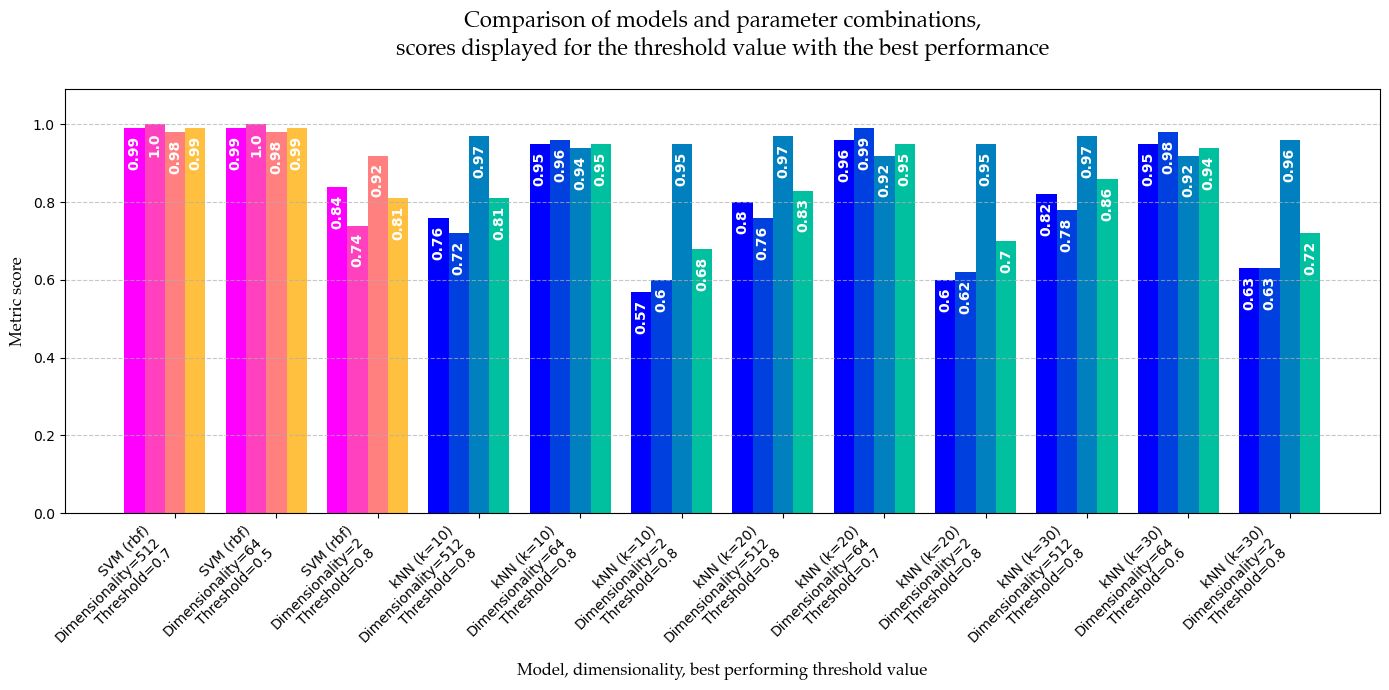

In [216]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

colormap_mapping = [
    {'model': 'svc_rbf', 'name': 'SVM (rbf)', 'colormap': 'spring'},
    {'model': 'knn_10', 'name': 'kNN (k=10)', 'colormap': 'winter'},
    {'model': 'knn_20', 'name': 'kNN (k=20)', 'colormap': 'winter'},
    {'model': 'knn_30', 'name':'kNN (k=30)', 'colormap': 'winter'}
]

plt.figure(figsize=(14, 7))

x_labels = df_multiclass.apply(lambda row: f"{row['Model_name']}\nDimensionality={row['Num_dim']}\nThreshold={row['Threshold']}", axis=1)
x = np.arange(len(df_multiclass))
width = 0.2

for i, metric in enumerate(metrics):
    models = df_multiclass['Model'].values
    
    for j, model in enumerate(models):
        colormap_name = next((item['colormap'] for item in colormap_mapping if item['model'] == model), 'Greens')
        colormap = plt.colormaps.get_cmap(colormap_name)

        color = colormap(i / len(metrics))
        bars = plt.bar(x[j] + i * width, df_multiclass.iloc[j][metric], width, color=color, label=metric if j == 0 else "")

        yval = df_multiclass.iloc[j][metric]
        plt.text(
            x[j] + i * width,
            yval - 0.02, 
            round(yval, 2),
            ha='center',
            va='top',
            color='white',
            weight='bold',
            rotation=90
        )

plt.xlabel('Model, dimensionality, best performing threshold value', fontdict=axis_font)
plt.ylabel('Metric score', fontdict=axis_font)
plt.title('Comparison of models and parameter combinations,\nscores displayed for the threshold value with the best performance\n', fontdict=title_font)
plt.ylim(0, 1.09)
plt.xticks(x + width * 2, x_labels, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()